
# **Color Spaces**

In this lesson we'll learn to:
1. View the individual channels of an RGB Image
2. Manipulate a color space
3. Introduce HSV Color Spaces

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
# 설정, 라이브러리 가져오기, Imshow 기능 만들기 및 이미지 다운로드
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!gdown --id 1O2uCujErifjvK1ziRGssaQO9khI15g6q
!unzip -qq images.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
From (redirected): https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q&confirm=t&uuid=801ed653-a7f2-48b9-aff5-066cf9572ff2
To: /content/images.zip
100% 29.6M/29.6M [00:00<00:00, 70.9MB/s]


In [2]:
# Load our input image
image = cv2.imread('./images/castara.jpeg')

# Use cv2.split to get each color space separately
# cv2.split을 사용하여 각 색 공간을 개별적으로 가져옵니다
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(1280, 960)
(1280, 960)
(1280, 960)


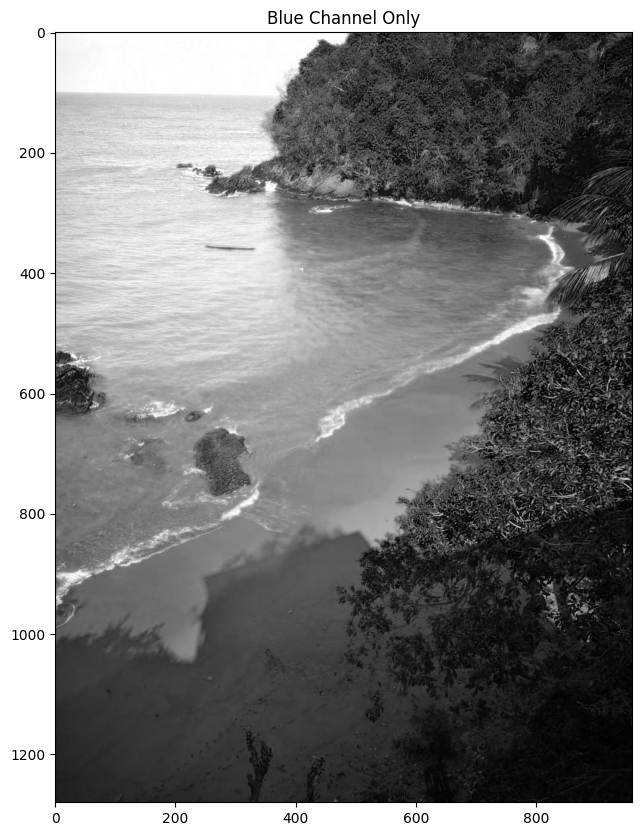

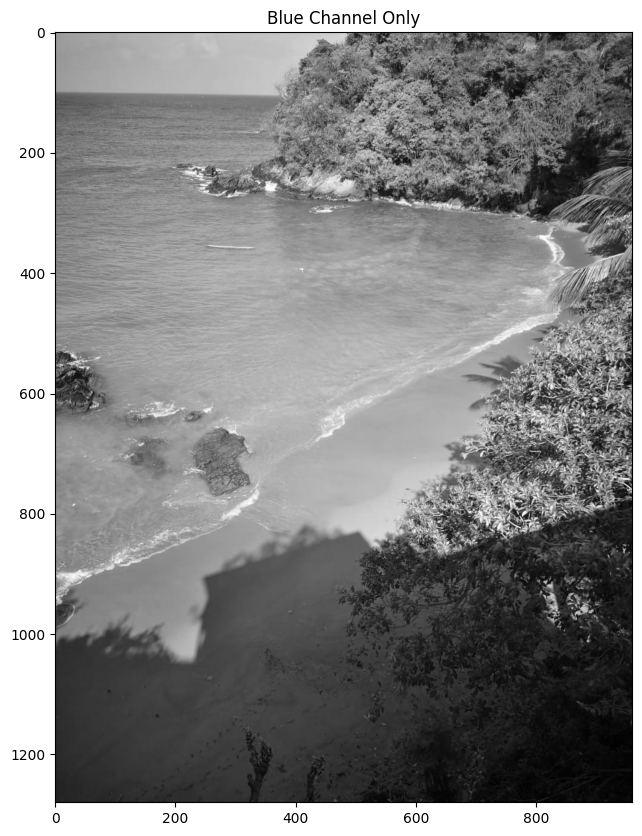

In [4]:
# Each color space on it's on will look like a grayscale as it lacks the other color channels
# 켜져 있는 각 색 공간은 다른 색 채널이 없기 때문에 회색 눈금처럼 보입니다
imshow("Blue Channel Only", B)

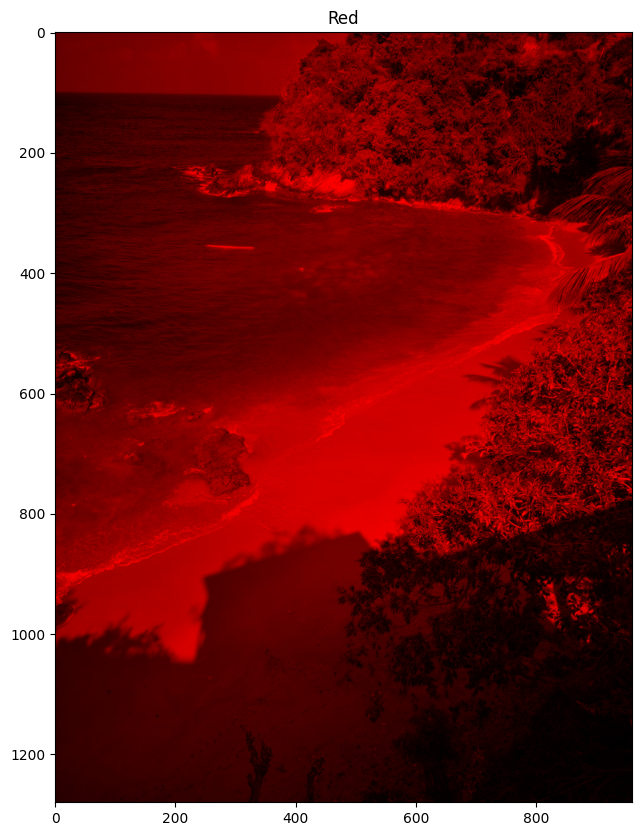

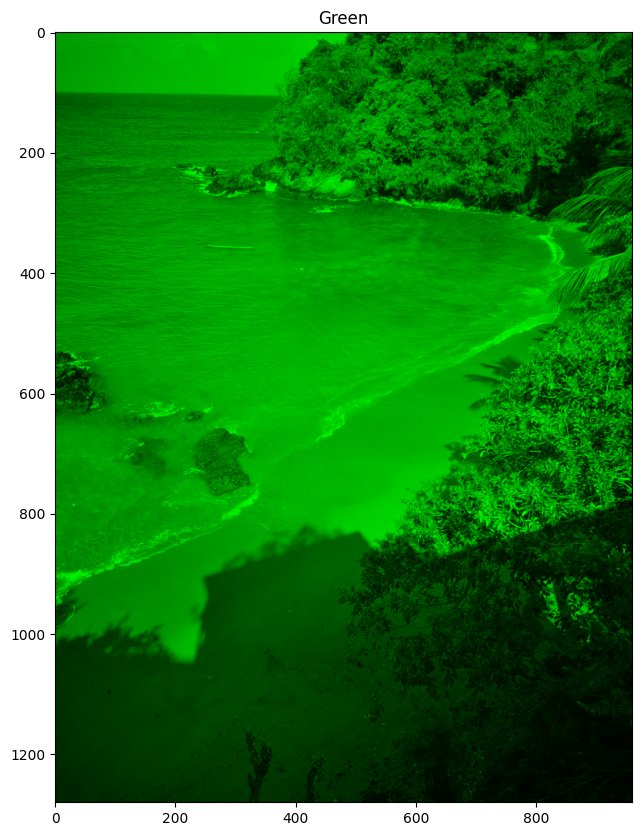

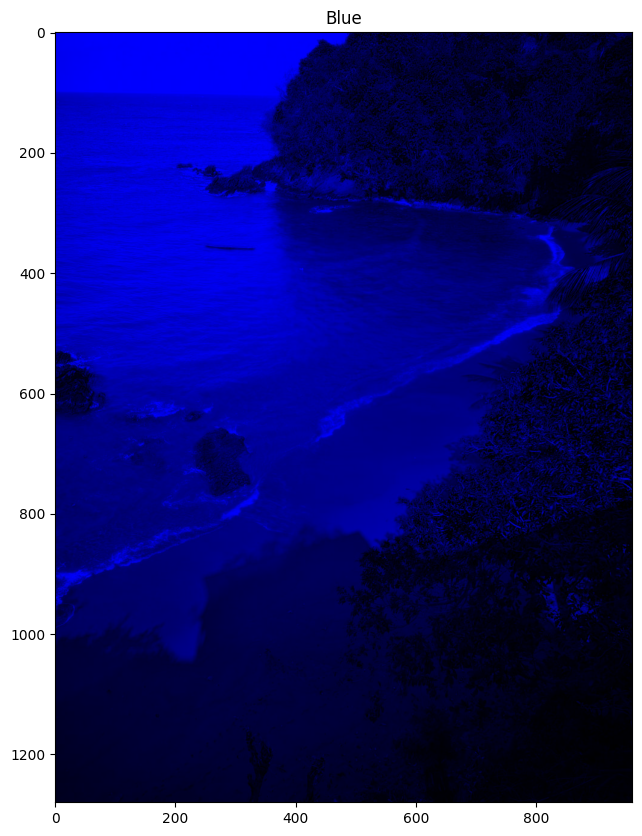

In [5]:
import numpy as np

# Let's create a matrix of zeros
# with dimensions of the image h x w
zeros = np.zeros(image.shape[:2], dtype = "uint8")

imshow("Red", cv2.merge([zeros, zeros, R]))
imshow("Green", cv2.merge([zeros, G, zeros]))
imshow("Blue", cv2.merge([B, zeros, zeros]))

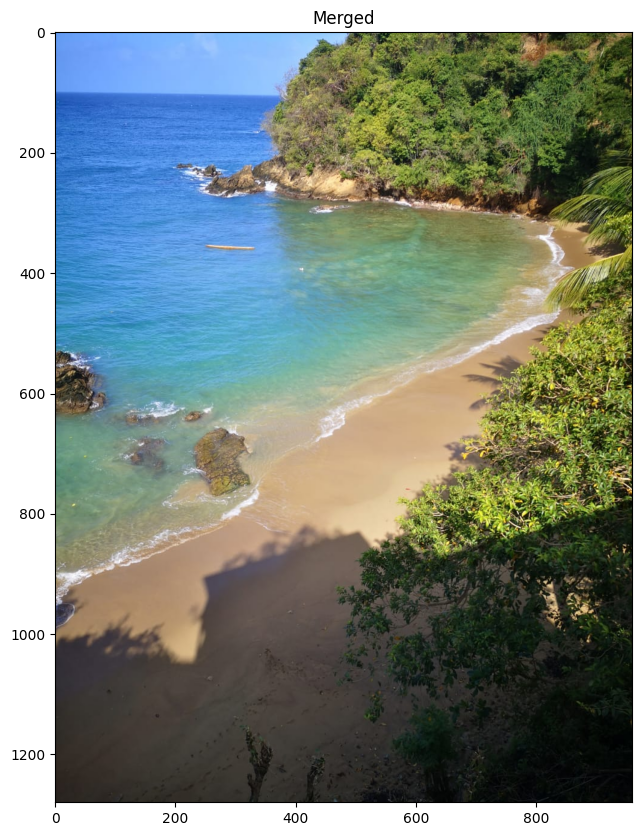

In [6]:
image = cv2.imread('./images/castara.jpeg')

# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)

# Let's re-make the original image,
merged = cv2.merge([B, G, R])
imshow("Merged", merged)

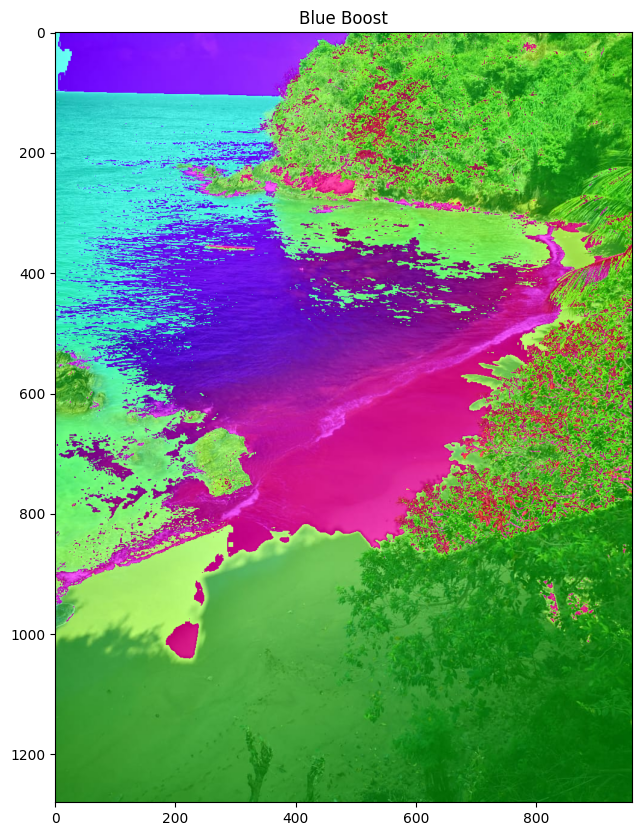

In [8]:
# Let's amplify the blue color
merged = cv2.merge([B, G+100, R])
imshow("Blue Boost", merged)

## **The HSV Color Space**

![](https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png)

- Hue: 0 - 179
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

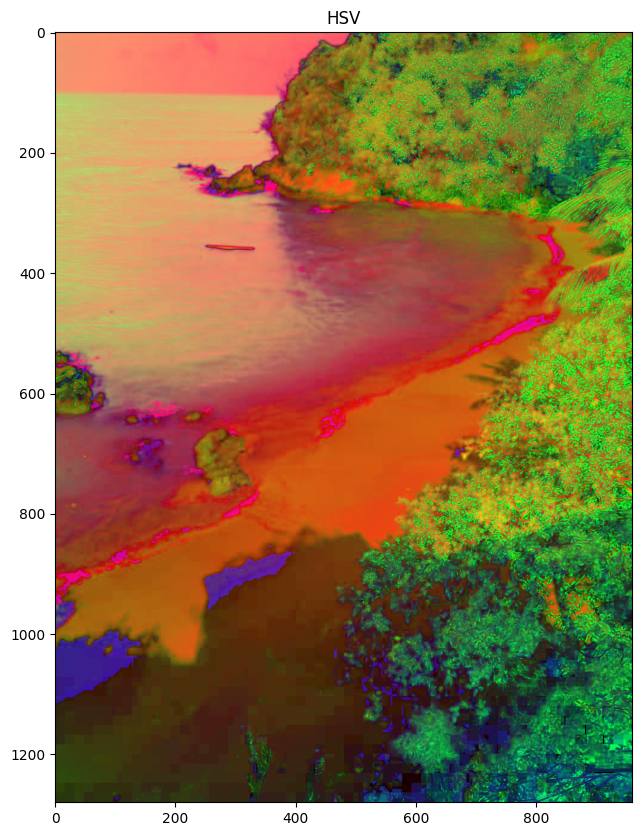

In [9]:
# Reload our image
image = cv2.imread('./images/castara.jpeg')

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imshow('HSV', hsv_image)

#### This looks odd....why?

Because our plotting function was designed for RGB only images, not HSV

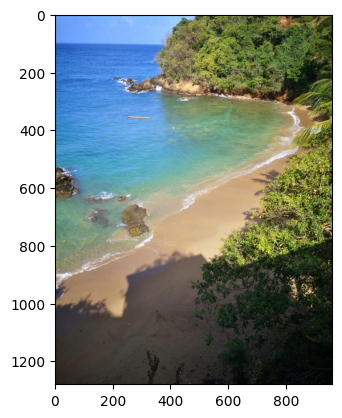

In [11]:
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.show()

### **Let's view each channel type in the HSV Color Space representation**

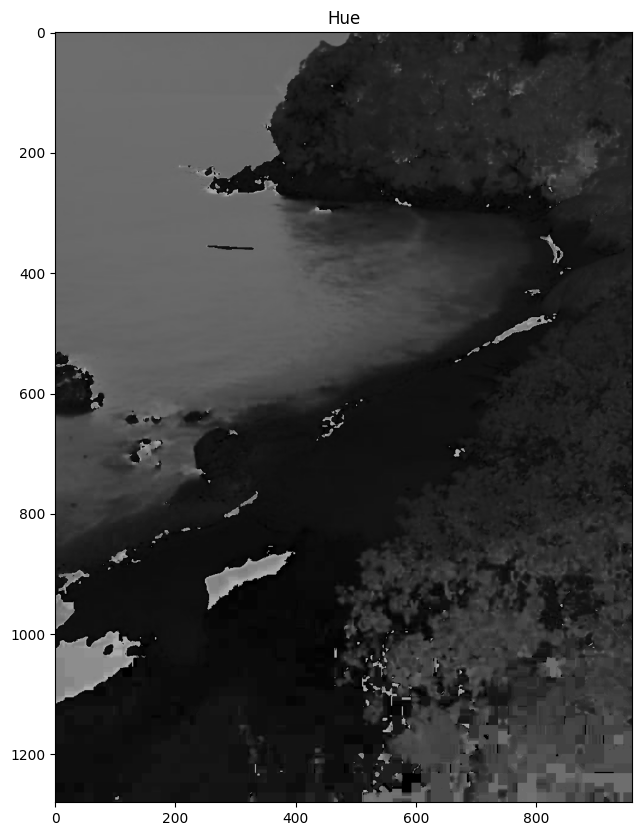

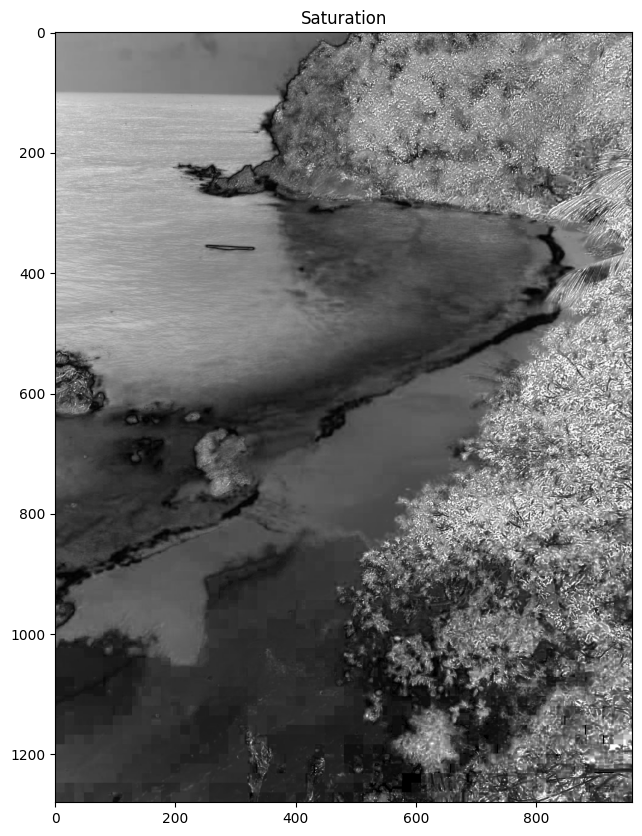

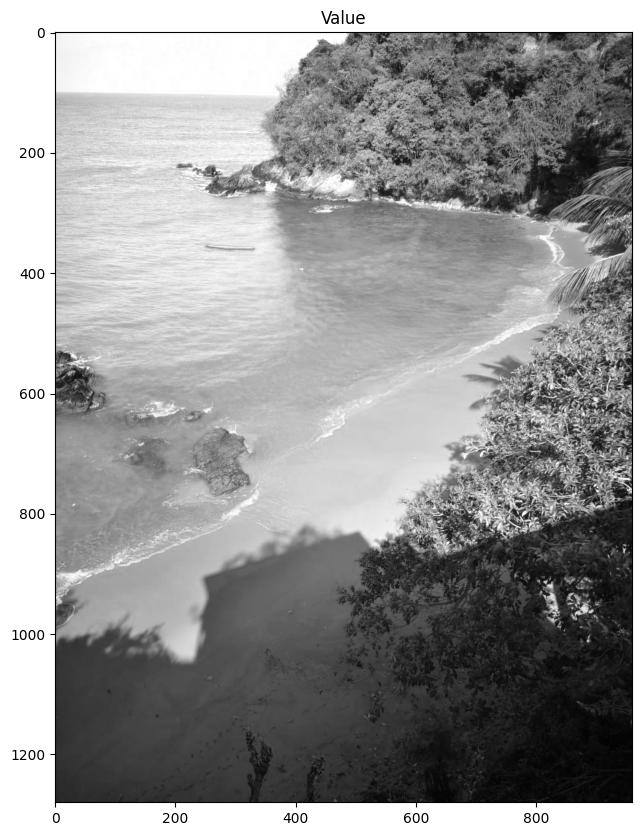

In [12]:
# Switching back to viewing the RGB representation
imshow("Hue", hsv_image[:, :, 0])
imshow("Saturation", hsv_image[:, :, 1])
imshow("Value", hsv_image[:, :, 2])